<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>Time Series Market Analysis </strong></span></b> </div> 

<img src="C:\Users\user\Desktop\Phase_IV\dsc-phase4-project\Choosing a Dataset\time-series\clock.jpg"alt="Description of the image">


### <b>I <span style='color:#16C2D5'>|</span> Data Understanding</b> 

### <b>I <span style='color:#16C2D5'>|</span> Objectives</b> 


1. Find the top ZipCodes to invest in that guarantee a good investment.
2. Investigate the zip codes among which have the most expensive houses were hardly hit by the financial crisis. Also investigate which areas bounced back almost immediately after the crisis. 
3. Develop a Time Series regression model that can forecast house values capturing the seasonality factor efficiently. 
4. Investigate the Metropolitan areas with high economic growth rates in terms of housing.
5. Investigate the zipcodes that were less severly and more severly affected by the Crisis.


### <b>III <span style='color:#16C2D5'>|</span> Importing libraries</b> 

In [16]:
import pandas as pd 
import numpy as np 
import itertools 

# Modelling libraries
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import r2_score, mean_squared_error 
from prophet import Prophet 
from neuralprophet import NeuralProphet 
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from pmdarima import auto_arima 

# Visualization libraries
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.tight_layout 
import seaborn as sns 
# Graph Fonts 
plt.rcParams['font.size'] = 12 
import bar_chart_race as bcr 

import warnings
warnings.filterwarnings('ignore')   

import joblib 


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Understanding</span></b> </div>



We seek out to understand the Zillow data provided containing average house prices. 
1. Check the data information.
2. Check for missing values.
3. Check for duplicated values. 

In [17]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [18]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,1732

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [20]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

The data has more than 200 columns and should be changed to a long formart. 
The data also does not have any duplicated values. 

The data is in a wide formart and therefore all the columns cannot be displayed to show the missing values. We can only see the Metro column which has 1043 missing values. Data in wide formart is had to do use because no preproccessing can be done it efficiently. Our objectives are tied to the date column and therefore necessarry to convert the data into a long formart for easy analysis. 

### Data Filtering

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 2. Data preprocessing and visualization</span></b> </div>


This step involves engineering new features that may help in understanding the data more better and do anefficient analysis. 
1. Convert the data from the wide to long formart. 
2. Convert the time column into a datetime column. 
3. Engineer new features for the month and year column from the date column. 

In [22]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName','RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna()
    return melted 

In [23]:
df_eda = melt_data(df)

In [24]:
df_eda.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


To get the top zipcodes the real estate investors can invest in, we use the metro politan areas which normally have a higher population with alot of industrail activities. Most of the houses in these regions always have ready markert for houses and this is what we will use in generating predictions and observe the significant increase of house value. 

Most metropolitan areas have high tenant properties and these guarantee a good **Return on Investment**.

In [25]:
df_eda['Year'] = df_eda['time'].dt.year
df_eda['Month'] = df_eda['time'].dt.month 

In [26]:
group_metropolitan = pd.DataFrame(df_eda.groupby(['Metro','RegionName'])['value'].agg('mean').sort_values(ascending=False).head(30))
group_metropolitan 

value
Metro                          RegionName              
New York                       10021       1.285427e+07
                               10011       7.755844e+06
                               10014       6.836902e+06
                               10128       5.085436e+06
San Francisco                  94027       3.487129e+06
Glenwood Springs               81611       3.147124e+06
Los Angeles-Long Beach-Anaheim 90210       2.789977e+06
Miami-Fort Lauderdale          33480       2.634498e+06
San Francisco                  94123       2.630977e+06
Brunswick                      31561       2.403194e+06
San Francisco                  94115       2.399030e+06
                               94109       2.395636e+06
Glenwood Springs               81615       2.300179e+06
Los Angeles-Long Beach-Anaheim 90402       2.292232e+06
San Diego                      92067       2.170122e+06
Los Angeles-Long Beach-Anaheim 90020       2.149644e+06
San Francisco                  94028       2.131495e+06
San Jose                       94301       2.084380e+06
New York                       7620        2.080074e+06
Los Angeles-Long Beach-Anaheim 92657       2.070006e+06
San Jose                       94022       2.066818e+06
San Francisco                  94957       2.043843e+06
Santa Maria-Santa Barbara      93108       1.991682e+06
New York                       11217       1.977407e+06
San Jose                       94305       1.918675e+06
Boston                         2116        1.887043e+06
Los Angeles-Long Beach-Anaheim 90265       1.876195e+06
San Francisco                  94133       1.833388e+06
New York                       11976       1.803404e+06
Los Angeles-Long Beach-Anaheim 90049       1.799291e+06

In [27]:
df_eda.reset_index(inplace=True)
df_eda.head()

,index,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value,Year,Month
0,0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0,1996,4
1,1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0,1996,4
2,2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0,1996,4
3,3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0,1996,4
4,4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0,1996,4


In [28]:
df_eda['Year'] = df_eda['time'].dt.year
df_eda['Month'] = df_eda['time'].dt.month 

<AxesSubplot: xlabel='State', ylabel='value'>

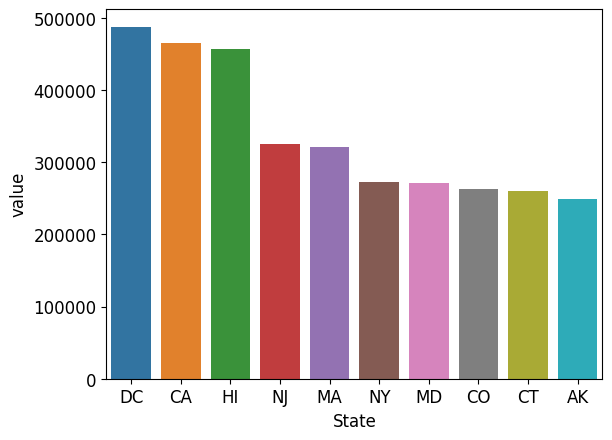

In [29]:
# Average house prices by state 
state_group = df_eda.groupby('State')['value'].agg('mean').sort_values(ascending=False).head(10)

sns.barplot(data=state_group.reset_index(), x='State', y='value')

In [30]:

# dc_slice = df_eda[df_eda['State'] == 'DC'] 
# # House price distribution prices in new York 
# sns.histplot(data=dc_slice, x='value', kde=True)

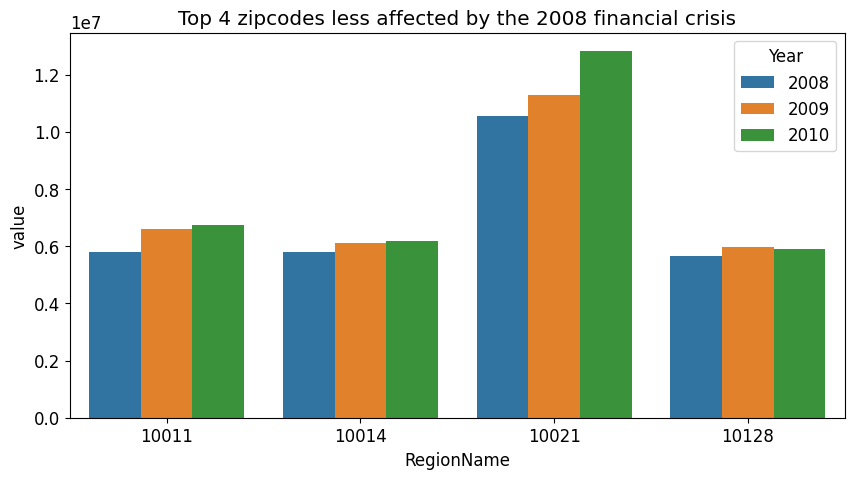

In [31]:
regions = [10021, 10011, 10014, 10128, 94027, 81611, 90210, 33480, 94123, 31561,
                   94115, 94109, 81615, 90402, 92067, 90020, 94028, 94301, 7620, 92657,
                   94022, 94957, 93108, 11217, 94305, 2116, 90265, 94133, 11976, 90049]


years = [2008, 2009, 2010]

plt.figure(figsize=(10,5))
filtered_df = df_eda[(df_eda['Year'].isin(years)) & df_eda['RegionName'].isin(regions)]
group_crisis = pd.DataFrame(filtered_df.groupby(['RegionName','Year'])['value'].agg('mean').sort_values(ascending=False)).head(12)
sns.barplot(data=group_crisis.reset_index(), x='RegionName', y='value', hue='Year')
plt.title("Top 4 zipcodes less affected by the 2008 financial crisis")
plt.show()


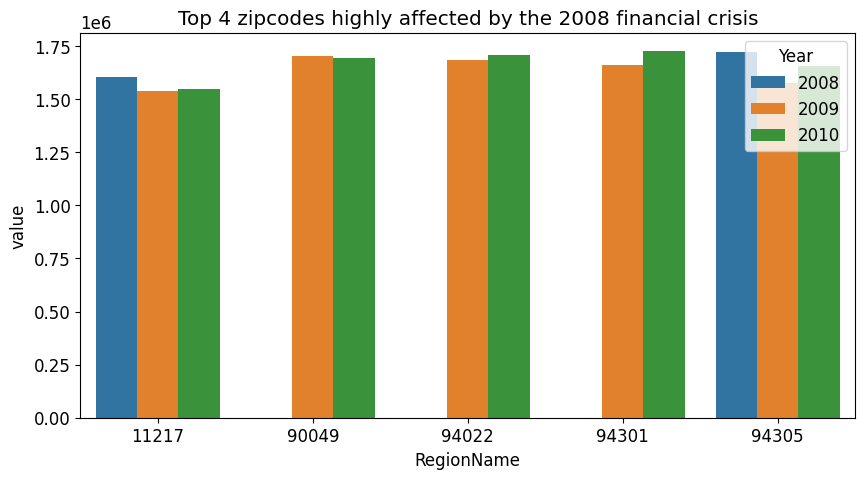

In [32]:
plt.figure(figsize=(10,5))
group_crisis2 = pd.DataFrame(filtered_df.groupby(['RegionName','Year'])['value'].agg('mean').sort_values(ascending=True)).head(12)
sns.barplot(data=group_crisis2.reset_index(), x='RegionName', y='value', hue='Year')
plt.title("Top 4 zipcodes highly affected by the 2008 financial crisis")
plt.show()

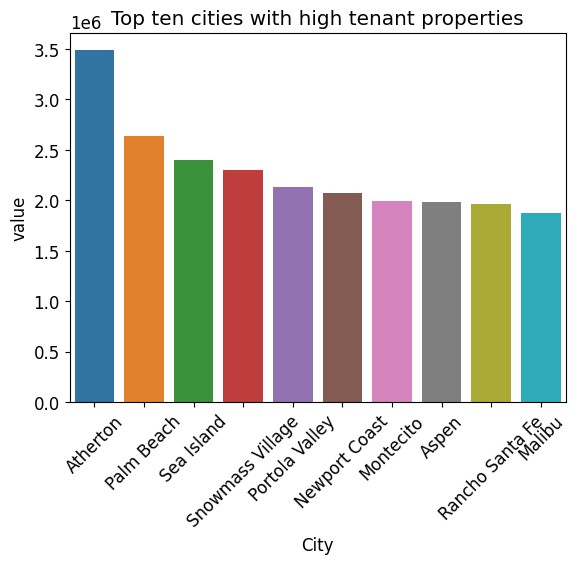

In [33]:
group_cities = pd.DataFrame(df_eda.groupby('City')['value'].agg('mean').sort_values(ascending=False)).head(10)

sns.barplot(data=group_cities.reset_index(), x='City', y='value')
plt.title("Top ten cities with high tenant properties")
plt.xticks(rotation=45)
plt.show() 

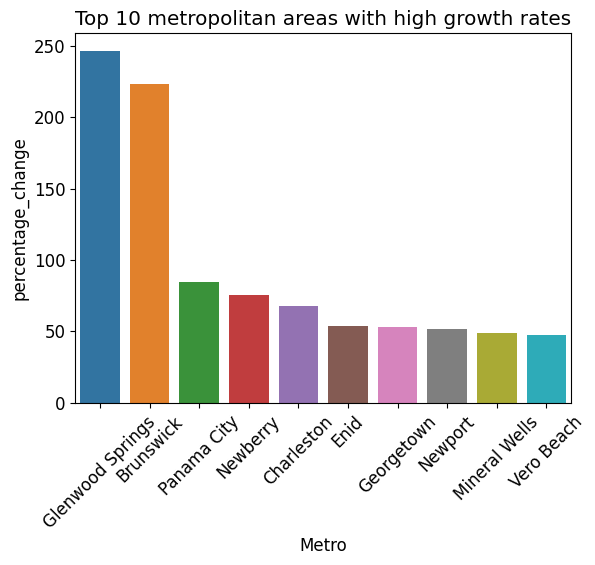

In [34]:

df_eda['percentage_change'] = df_eda.groupby('Metro')['value'].pct_change() * 100

average_percentage_change = pd.DataFrame(df_eda.groupby('Metro')['percentage_change'].mean().sort_values(ascending=False)).head(10)
sns.barplot(data=average_percentage_change.reset_index(), x='Metro', y='percentage_change')
plt.title("Top 10 metropolitan areas with high growth rates")
plt.xticks(rotation=45)
plt.show()


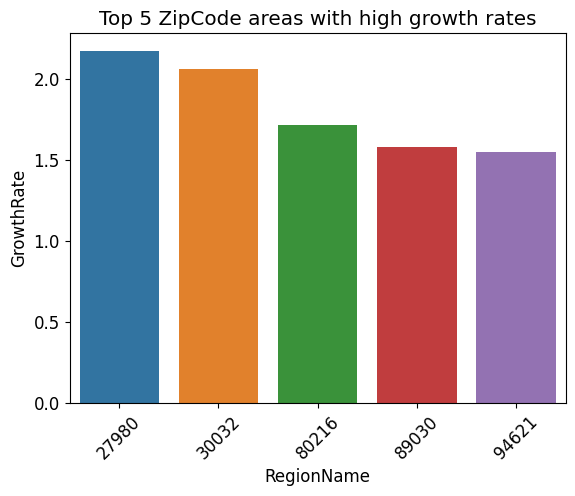

In [35]:

df_eda['GrowthRate'] = df_eda.groupby('RegionName')['value'].pct_change() * 100

average_pct_change = pd.DataFrame(df_eda.groupby('RegionName')['GrowthRate'].mean().sort_values(ascending=False)).head(5)
sns.barplot(data=average_pct_change.reset_index(), x='RegionName', y='GrowthRate')
plt.title("Top 5 ZipCode areas with high growth rates")
plt.xticks(rotation=45)
plt.show()


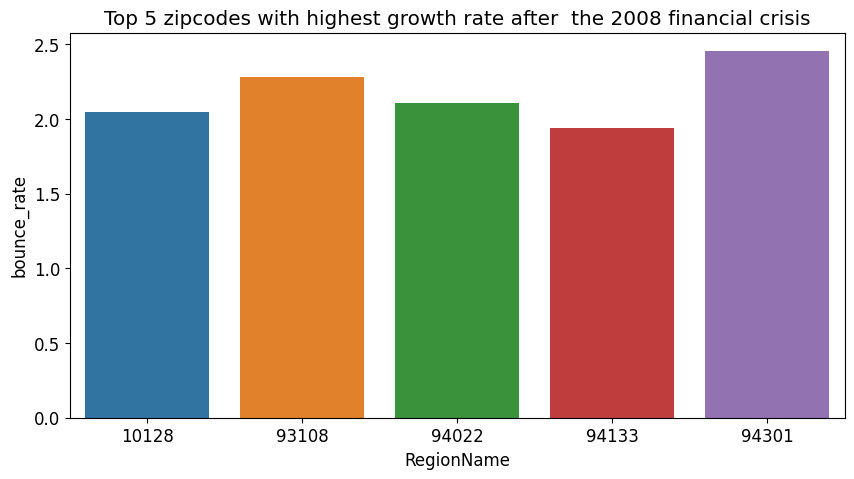

In [36]:
# Investigate among the high end estates, which regions specifically zip codes that had a good growth rate after the crisis. 
years2 = [2011, 2012, 2013, 2014, 2015 ]

plt.figure(figsize=(10,5))
filtered_df2 = df_eda[(df_eda['Year'].isin(years2)) & (df_eda['RegionName'].isin(regions))]
filtered_df2['bounce_rate'] = df_eda.groupby('RegionName')['value'].pct_change() * 100
group_crisis = pd.DataFrame(filtered_df2.groupby(['RegionName','Year'])['bounce_rate'].agg('mean').sort_values(ascending=False)).head(5)
sns.barplot(data=group_crisis.reset_index(), x='RegionName', y='bounce_rate')
plt.title("Top 5 zipcodes with highest growth rate after  the 2008 financial crisis")
plt.show()

We would also like to investigate the growth rate of the regions that were less affected by the financial crisis and alos those that were severely affected by the crisis. 

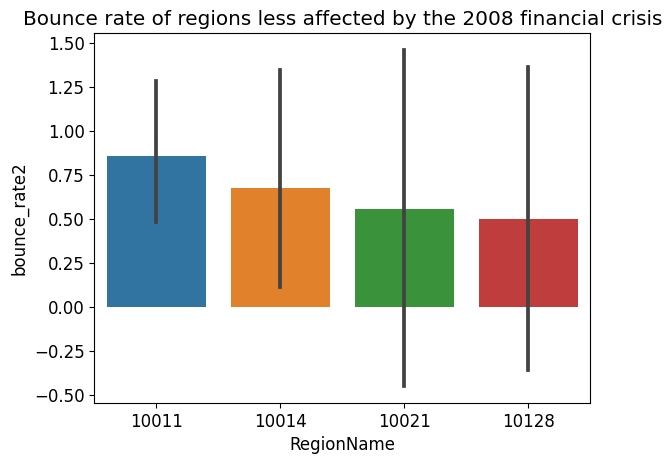

In [37]:
regions2 = [10011, 10014, 10021, 10128]

filtered_df2 = df_eda[(df_eda['Year'].isin(years2)) & (df_eda['RegionName'].isin(regions2))]
filtered_df2['bounce_rate2'] = df_eda.groupby('RegionName')['value'].pct_change() * 100
group_crisis = pd.DataFrame(filtered_df2.groupby(['RegionName','Year'])['bounce_rate2'].agg('mean').sort_values(ascending=False))
sns.barplot(data=group_crisis.reset_index(), x='RegionName', y='bounce_rate2')
plt.title("Bounce rate of regions less affected by the 2008 financial crisis")
plt.show()


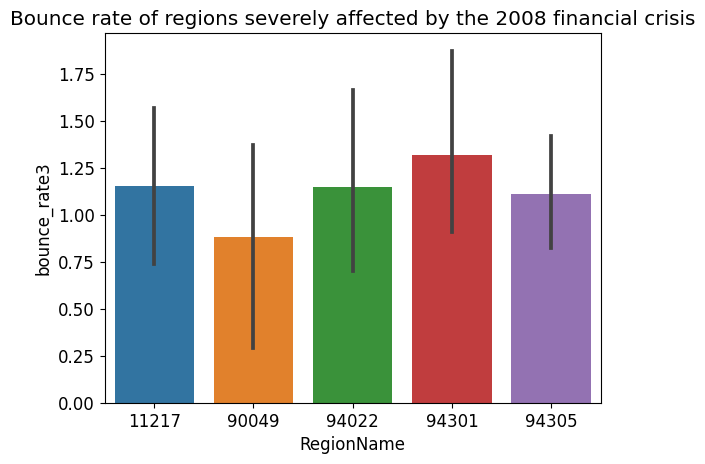

In [38]:
regions3 = [11217, 90049, 94022, 94301, 94305]

filtered_df3 = df_eda[(df_eda['Year'].isin(years2)) & (df_eda['RegionName'].isin(regions3))]
filtered_df3['bounce_rate3'] = df_eda.groupby('RegionName')['value'].pct_change() * 100
group_crisis3 = pd.DataFrame(filtered_df3.groupby(['RegionName','Year'])['bounce_rate3'].agg('mean').sort_values(ascending=False))
sns.barplot(data=group_crisis3.reset_index(), x='RegionName', y='bounce_rate3')
plt.title("Bounce rate of regions severely affected by the 2008 financial crisis")
plt.show()

### <b> <span style='color:#16C2D5'>|</span> EDA Conclusion</b>

* Wasington DC has the highest priced homes. 
* ZipCodes **10021, 10011, 10014 and 10128 were among the top priced regions less affected by the 2008 financial crisis. 
* Glenwood Springs, Brunswick are the cities with high growth rates of 250% and 225%.
* Zipcode 10011 had the highest bounce back rate of 0.85% after the market crush.
* ZipCode 94301 and 94022 which were severely affected by the crisis had the highest rates at 1.3% and 1.1% respectively. 


In [39]:
# import bar_chart_race as br 

# bar = br.bar_chart_race(df=bar_animation, filename=None, figsize=(3.5,3), title="House price changes by state")

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 3. Modelling </span></b> </div>


Modelling in time series involves the use of Auto Regressive models which uses lagged features to predict the future values. Since most time series data always has the component of trend and sesonality, the ARIMA models have the idea of differencing to ensure stationarity. This is also one of the assumptions of ARMA models. 

With that said, the data we have has to be transformed from the wide formart to the long formart to ensure uniformity and an easy resampling and modelling process. 

In this section, we seek out to build a forecasting model to predict the house prices for the **ZipCodes** which are high priced and have good prospects for  a good **Return on Investment**. This will finally help us have a solid recommendation to give to our investors regarding the best zipCodes to invest in. 

The conents of this phase include:
* Transforming data 
* Data Resampling 
* Baseline model 
* Auto Arima model 
* Arima Models
* Facebook Prophet(ETL pipeline) 

### <b><span style='color:#16C2D5'>|</span> Transforming data from wide to long formart</b> 

In [40]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName','RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna()
    return melted 

In [41]:
df_model = melt_data(df)
df_model.set_index('time', inplace=True)

Setting the time as the index column allows easier resampling as well as slicing of data. The from the melting function has many rows and as such training would only need a fraction or small sample of the data to represent the whole population. It is computationally expensive to run models on very huge sets of data especially ARMA models. They are not efficient to handle big data. 

In [42]:
df_model.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,77300.0


### <b> <span style='color:#16C2D5'>|</span> Data Resampling</b> 
Data resampling in Time series data is very important because it aggregates data on a different frequency than what it was collected and changes frequency of a time series data. Resampling serves to **remove noise** or rather **random fluctuations**.
The various ways to resample data are: 
**A - Year End, M - Month end, W - Weekly, D - Daily and MS - Month start**. The data at our disposal seems to be on a month start basis and that is the best resampling technique for this problem. 


<AxesSubplot: xlabel='time'>

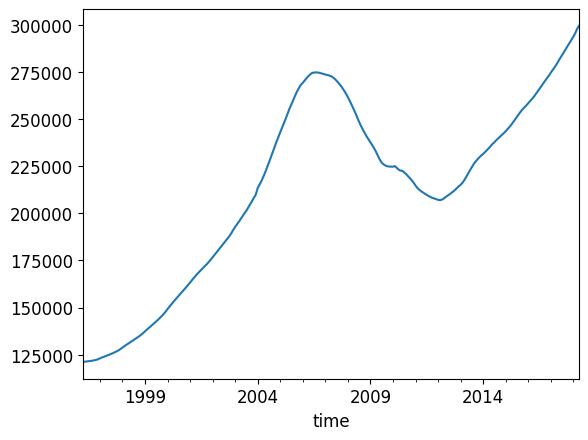

In [43]:
df_model2 = df_model['value'].resample('MS').mean()
df_model2.plot()

The plot from the monthly resampled data shows a steday growth from 1999 upto 2007. This was greatly attribute to the subprime housing mortgages given to low income earners. As from 2008, there is a increasingly staedy drop in the value of houses and this was due to the housing market crash in 2008 This is the period when the **US** had a housing Crisis majorly caused by subprime mortgages, huge debts and low regulation in the financial sector. The value of homes dropped and many home owners and investors could not keep up with their mortgages.

As outlined in [https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp], the US was faced with a financial crisis when the housing syatem collapsed and value of house prices plummuted. 

This housing project by the government was however cut short by the ever increasing default rates and debts caused by the high risk mortgages given by the US government. Many of the low income earners would pay up low initial payments and thereafter huge interest rates. This build up of debts caused a major reccession to the point of the government bailing out home owners because most ended up bankrupt with low value homes. 



In [44]:
# Function for the autocorrellation plots 
def corr_plots(data):
    acf_diff = plot_acf(data)
    pacf_plot = plot_pacf(data)
    adfttest = adfuller(data)
    print(f"The p value is {adfttest[1]}")
    
    return acf_diff, pacf_plot

The p value is 0.27562767729226234


(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

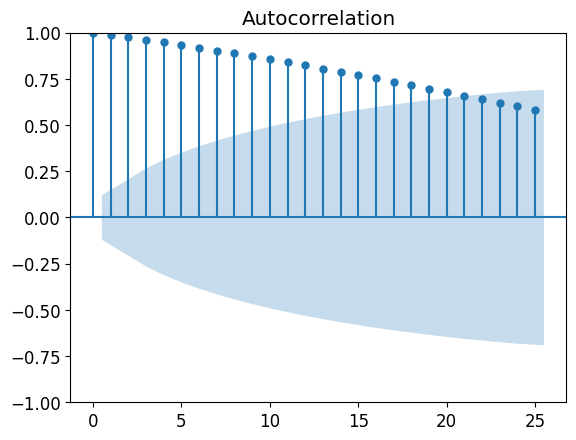

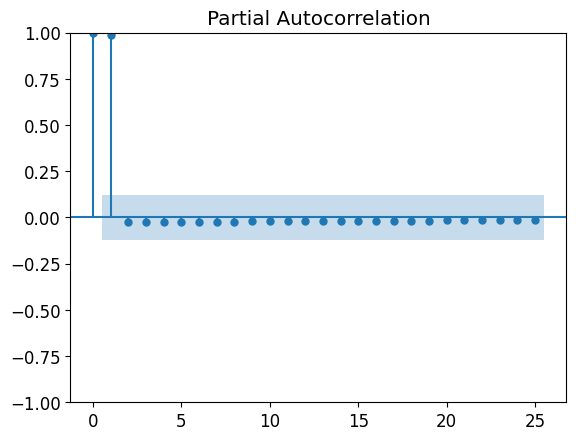

In [45]:
corr_plots(df_model2)

From the auto-correlation plots, it is very evident that the house value drop between 2008 and 2012 introduced very high seasonality.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Baseline model</span></b> </div>
Building a forecasting model on the whole data seems infeasible. We seek to narrow down the forecast to only the afore mentioned **top 30 zipcodes** with the highest prices. 

The approach taken was looping through the zipcodes column, train a baseline model, forecast using lagged values and finally saving the forecasted values together with their respective percentage change. The **TimseSeriesSplit** is used to split the data into train and test splits on the index column. The baseline model uses the **pdq values** of order **1,0,1** as obtained from the correlation plots. 

In [46]:

unique_counties = [10021, 10011, 10014, 10128, 94027, 81611, 90210, 33480, 94123, 31561,
                   94115, 94109, 81615, 90402, 92067, 90020, 94028, 94301, 7620, 92657,
                   94022, 94957, 93108, 11217, 94305, 2116, 90265, 94133, 11976, 90049]

tsc = TimeSeriesSplit(n_splits=5)

all_train_dates, all_test_dates = [], []
all_train_values, all_test_values = [], []
all_forecasts = []

results_list1 = []

for county in unique_counties:
    county_data = df_model[df_model['RegionName'] == county]

    # Split the data 
    dates = county_data.index
    values = county_data['value'].values

    # accumulate values for each fold
    zip_train_dates, zip_test_dates = [], []
    zip_train_values, zip_test_values = [], []

    for train_index, test_index in tsc.split(dates):
        train_dates, test_dates = dates[train_index], dates[test_index]
        train_values, test_values = values[train_index], values[test_index]

        zip_train_dates.extend(train_dates)
        zip_test_dates.extend(test_dates)
        zip_train_values.extend(train_values)
        zip_test_values.extend(test_values)

        
        baseline_model = ARIMA(train_values, order=(1, 0, 1)).fit()
        forecast = pd.Series(baseline_model.predict(start=len(train_values), end=len(train_values) + 11, typ='levels'))

        all_forecasts.extend(forecast)

    
        forecasted_value = forecast.iloc[-1]
        real_value = test_values[-1]
        percentage_change = ((forecasted_value - real_value) / real_value) * 100

        results_list1.append({'County': county, 'Forecast': forecasted_value, 'Real': real_value, 'Percentage Change': percentage_change})


results_df = pd.DataFrame(results_list1)

In [47]:
results_df 


,County,Forecast,Real,Percentage Change
0,10021,9.830246e+06,10883800.0,-9.680016
1,10021,1.077231e+07,13043800.0,-17.414338
2,10021,1.275458e+07,11630200.0,9.667799
3,10021,1.158979e+07,18341500.0,-36.811086
4,10021,1.814077e+07,17894900.0,1.373952
...,...,...,...,...
145,90049,1.003389e+06,1567600.0,-35.991998
146,90049,1.577039e+06,2163800.0,-27.117155
147,90049,2.159892e+06,1672400.0,29.149234
148,90049,1.673893e+06,2472600.0,-32.302311


The county column seems to have duplicated values and this is because the **TimeSeriesSplit** acts as a cross validation technique and splits data into folds.

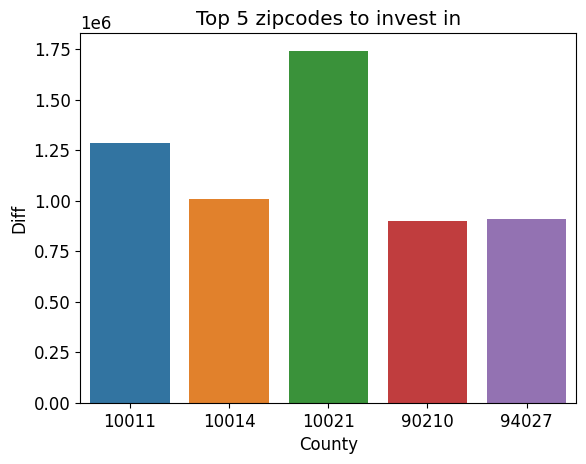

In [48]:
#Plotting the zipcodes with high forecasted values
avg_results = results_df.groupby('County')[['Forecast', 'Real']].mean().reset_index()
avg_results['Diff'] =avg_results['Real'] - avg_results['Forecast']
top_5 = avg_results.sort_values(by='Diff', ascending=False).head(5)
sns.barplot(data=top_5, x='County', y='Diff')
plt.title("Top 5 zipcodes to invest in")
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Auto arima model</span></b> </div>

After doing forecasting on the selected zipcodes using a baseline model, we go ahead and try to use the auto arima to get the best pdq combinations to minimze the AIC score. 

The idea of looping and using the **TrainTestSplit** comes in handy as various combinations are tried for every fold to get the lowest AIC scores. 

In [49]:
for county in unique_counties:
    county_data = df_model[df_model['RegionName'] == county]

    # Split the data 
    dates = county_data.index
    values = county_data['value'].values

    # accumulate results for each fold
    zip_train_dates, zip_test_dates = [], []
    zip_train_values, zip_test_values = [], []

    for train_index, test_index in tsc.split(dates):
        train_dates, test_dates = dates[train_index], dates[test_index]
        train_values, test_values = values[train_index], values[test_index]

        zip_train_dates.extend(train_dates)
        zip_test_dates.extend(test_dates)
        zip_train_values.extend(train_values)
        zip_test_values.extend(test_values)

        
        auto_model = auto_arima(train_values, trace=True, suppress_warnings=True)
        auto_model.summary()
    

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=798.472, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=991.727, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=983.334, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1124.743, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=858.266, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=783.861, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=833.611, Time=0.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=770.890, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=823.210, Time=0.12 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=779.522, Time=0.39 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=84

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> ARIMA(0,2,0)</span></b> </div>

From the various pdq combinations, the one with the lowest score accross several folds is **0,2,0** and **1,2,1**. These are the combinations to test out on the **ARMA** models and analyze their AIC scores. This is because most time series models are prone to overfitting and as such there is need to test out more than one comnination. 

In [50]:

def model_func(order):
    results_list2 = []
    for county in unique_counties:
        county_data = df_model[df_model['RegionName'] == county]

        # Split the data 
        dates = county_data.index
        values = county_data['value'].values

        # accumulate values for each fold
        zip_train_dates, zip_test_dates = [], []
        zip_train_values, zip_test_values = [], []

        for train_index, test_index in tsc.split(dates):
            train_dates, test_dates = dates[train_index], dates[test_index]
            train_values, test_values = values[train_index], values[test_index]

            zip_train_dates.extend(train_dates)
            zip_test_dates.extend(test_dates)
            zip_train_values.extend(train_values)
            zip_test_values.extend(test_values)

            
            model = ARIMA(train_values, order=order).fit()
            forecast = pd.Series(model.predict(start=len(train_values), end=len(train_values) + 11, typ='levels'))
            
            print(model.summary())

            all_forecasts.extend(forecast)

        
            forecasted_value = forecast.iloc[-1]
            real_value = test_values[-1]
            percentage_change = ((forecasted_value - real_value) / real_value) * 100

            results_df = pd.DataFrame(results_list2.append({'County': county, 'Forecast': forecasted_value, 'Real': real_value, 'Percentage Change': percentage_change}))
            
    return results_df    

In [51]:
model_func(order=(0,2,0))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -387.275
Date:                Thu, 18 Jan 2024   AIC                            776.550
Time:                        12:38:26   BIC                            777.951
Sample:                             0   HQIC                           776.998
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.94e+09   1.86e+09      4.802      0.000    5.29e+09    1.26e+10
Ljung-Box (L1) (Q):                  23.71   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.00   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1330.474
Date:                Thu, 18 Jan 2024   AIC                           2662.948
Time:                        12:38:27   BIC                           2665.611
Sample:                             0   HQIC                          2664.027
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.587e+09   5.82e+08      7.887      0.000    3.45e+09    5.73e+09
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.06   Pr

""


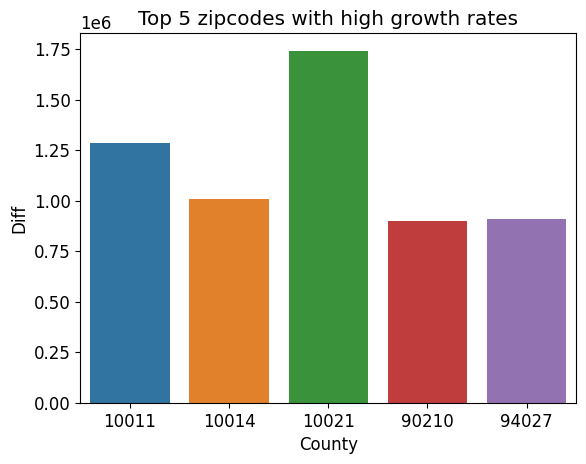

In [52]:
avg_results2 = results_df.groupby('County')[['Forecast', 'Real']].mean().reset_index()
avg_results2['Diff'] =avg_results['Real'] - avg_results2['Forecast']
top_5 = avg_results2.sort_values(by='Diff', ascending=False).head(5)
sns.barplot(data=top_5, x='County', y='Diff')
plt.title("Top 5 zipcodes with high growth rates")
plt.show()

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> ARIMA(1,2,1)</span></b> </div>

In [53]:

def model_func(order):
    results_list3 = []
    for county in unique_counties:
        county_data = df_model[df_model['RegionName'] == county]

        # Split the data 
        dates = county_data.index
        values = county_data['value'].values

        # accumulate values for each fold
        zip_train_dates, zip_test_dates = [], []
        zip_train_values, zip_test_values = [], []

        for train_index, test_index in tsc.split(dates):
            train_dates, test_dates = dates[train_index], dates[test_index]
            train_values, test_values = values[train_index], values[test_index]

            zip_train_dates.extend(train_dates)
            zip_test_dates.extend(test_dates)
            zip_train_values.extend(train_values)
            zip_test_values.extend(test_values)

            
            model = ARIMA(train_values, order=order).fit()
            forecast = pd.Series(model.predict(start=len(train_values), end=len(train_values) + 11, typ='levels'))
            
            print(model.summary())

            all_forecasts.extend(forecast)

        
            forecasted_value = forecast.iloc[-1]
            real_value = test_values[-1]
            percentage_change = ((forecasted_value - real_value) / real_value) * 100

            results_df = pd.DataFrame(results_list3.append({'County': county, 'Forecast': forecasted_value, 'Real': real_value, 'Percentage Change': percentage_change}))
            
    return results_df    

In [54]:
model_func(order=(1,2,1))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -387.712
Date:                Thu, 18 Jan 2024   AIC                            781.424
Time:                        12:38:30   BIC                            785.627
Sample:                             0   HQIC                           782.768
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.091     10.970      0.000       0.821       1.179
ma.L1         -1.0000      0.279     -3.589      0.000      -1.546      -0.454
sigma2      7.496e+09   3.72e-11   2.02e+20      0.0

""


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> FaceBook model</span></b> </div>

After testing out the various ARIMA models, we seek to try out the **FaceBook** prophet model which handles the concept of seasonalty pretty well. The prophet model however requires the data columns to be in **ds** for the date column and **y** for the target column.

To have a simple modelling process, we reset the index for the modelling data to make the time column extraction easy using the loop and later save the results to a CSV file. This data will be processed through an **Extract-Transform-Load** pipeline having the Prophet model. 

The concept of automation is very paramount because it helps in easier code manageability and debugging. It also offers better scalability especially when dealing with huge projects.
this is manageable by using the traditional **OOP** approach where everything is automated from the ingestion of data, renaming of columns, dropping null values, training, evaluating a model and later saving the model for future deployment purposes. 


In [55]:
df_model.reset_index(inplace=True)

In [56]:
# Create a csv file for the selected zip codes and to be used in the Prophet pipeline. 
for county in unique_counties:
    county_data = df_model[df_model['RegionName'] == county][['time', 'value']].copy()
    county_data.to_csv('Zipcode_predict.csv')

### <b><span style='color:#16C2D5'>|</span> Average House prediction</b>

The data to be used in the forecasting of the average house prices for every month comes from the melt function. The data is aggregated on a monthly basis togther with their respective average values. 

14:00:15 - cmdstanpy - INFO - Chain [1] start processing
14:00:46 - cmdstanpy - INFO - Chain [1] done processing


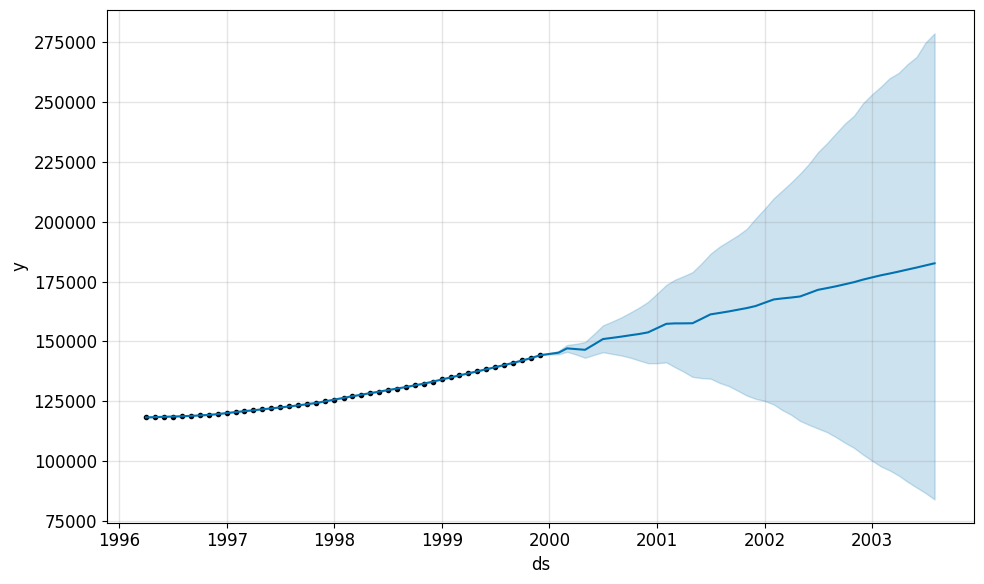

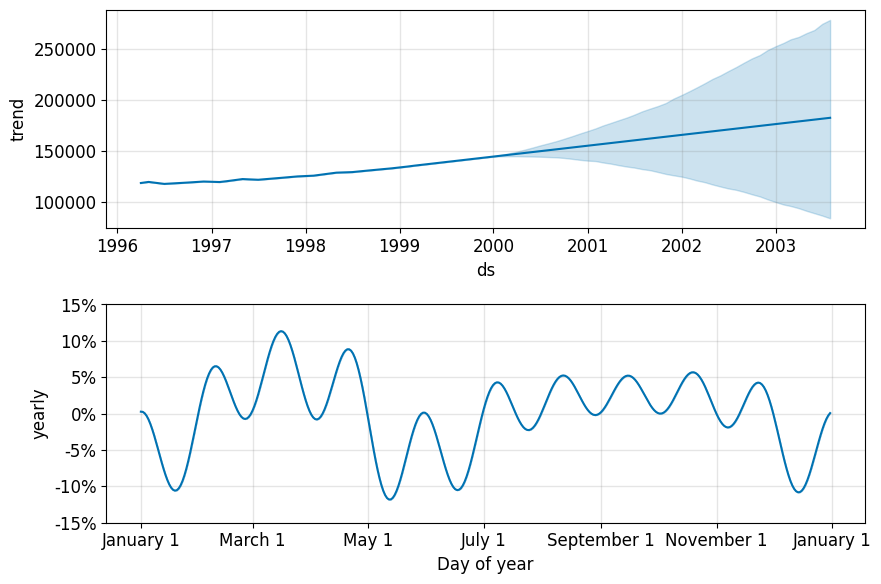

14:00:47 - cmdstanpy - INFO - Chain [1] start processing
14:00:48 - cmdstanpy - INFO - Chain [1] done processing


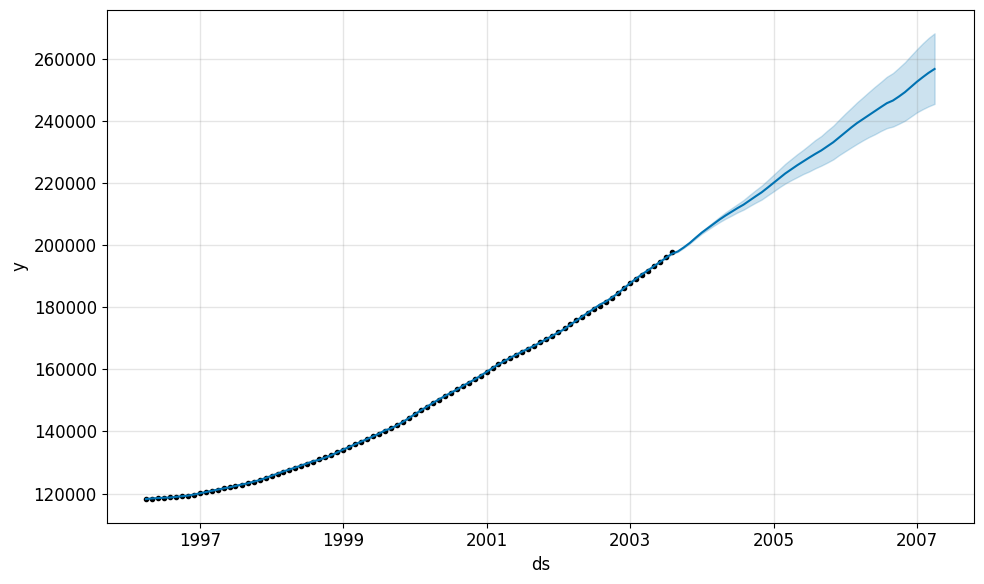

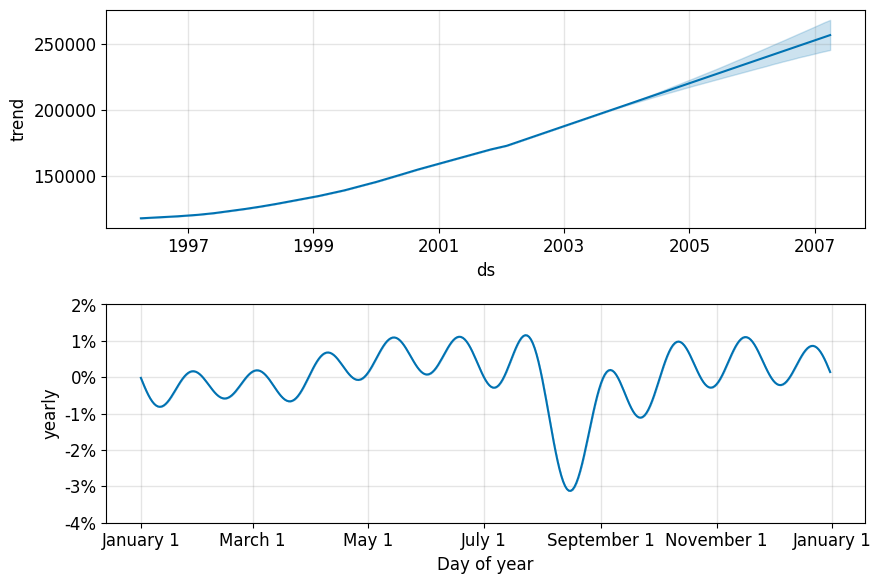

14:00:49 - cmdstanpy - INFO - Chain [1] start processing
14:00:49 - cmdstanpy - INFO - Chain [1] done processing


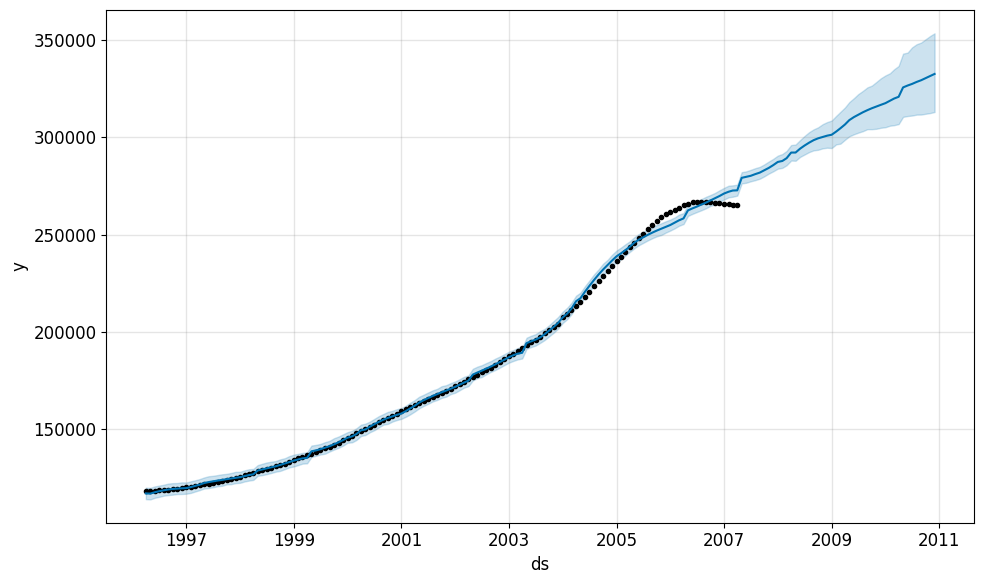

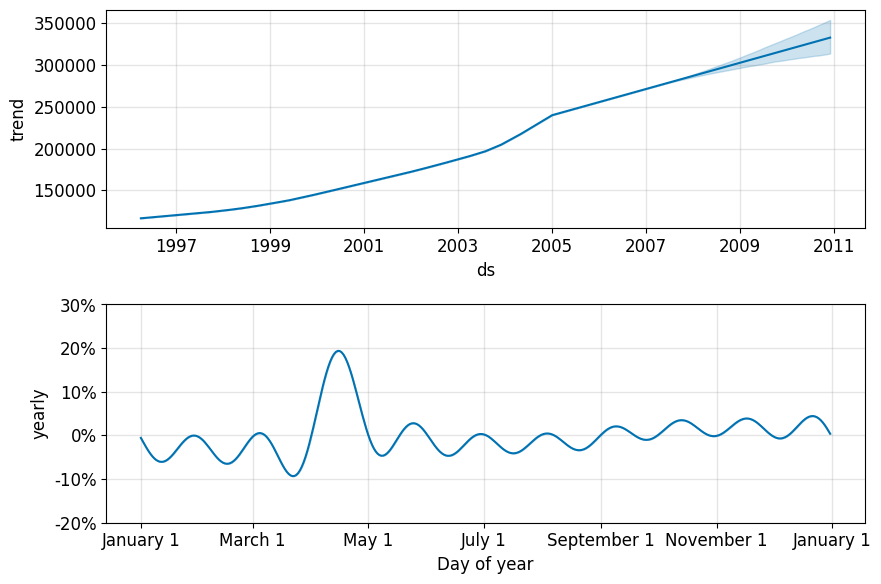

14:00:50 - cmdstanpy - INFO - Chain [1] start processing
14:00:50 - cmdstanpy - INFO - Chain [1] done processing


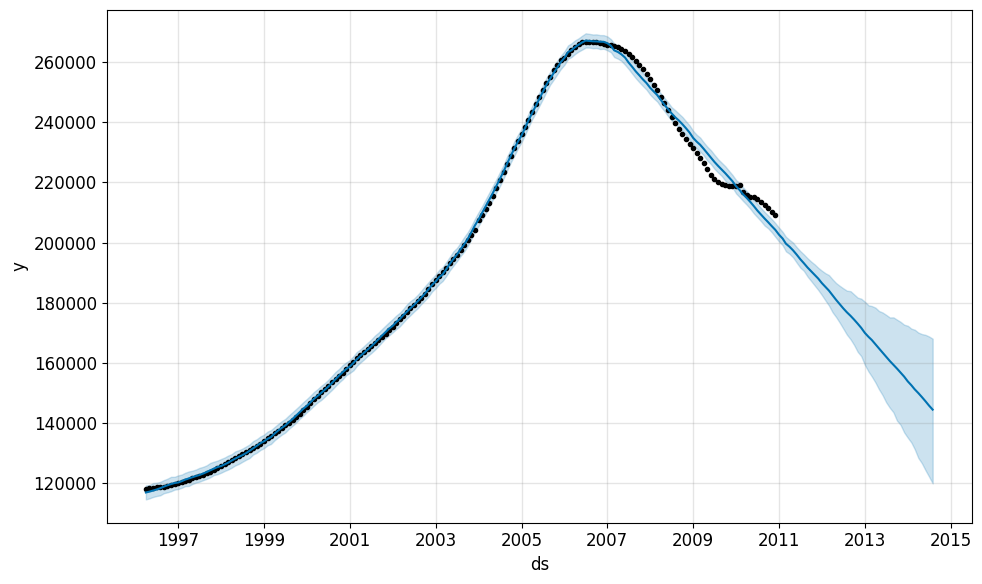

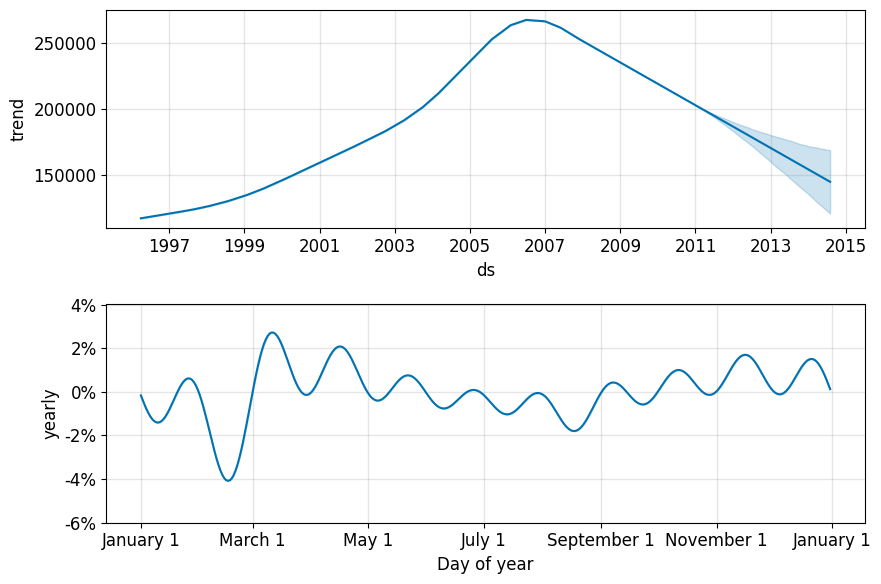

14:00:51 - cmdstanpy - INFO - Chain [1] start processing
14:00:52 - cmdstanpy - INFO - Chain [1] done processing


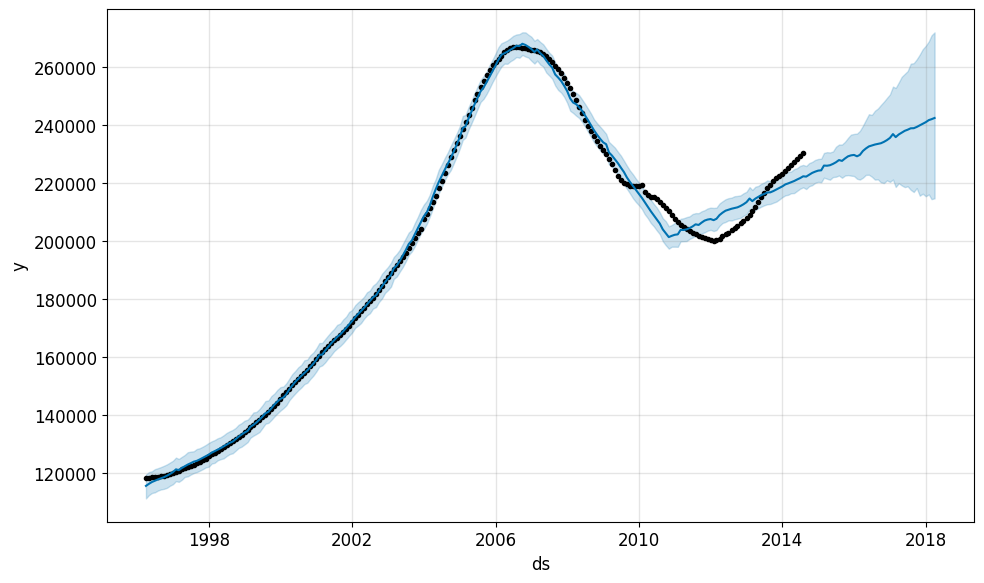

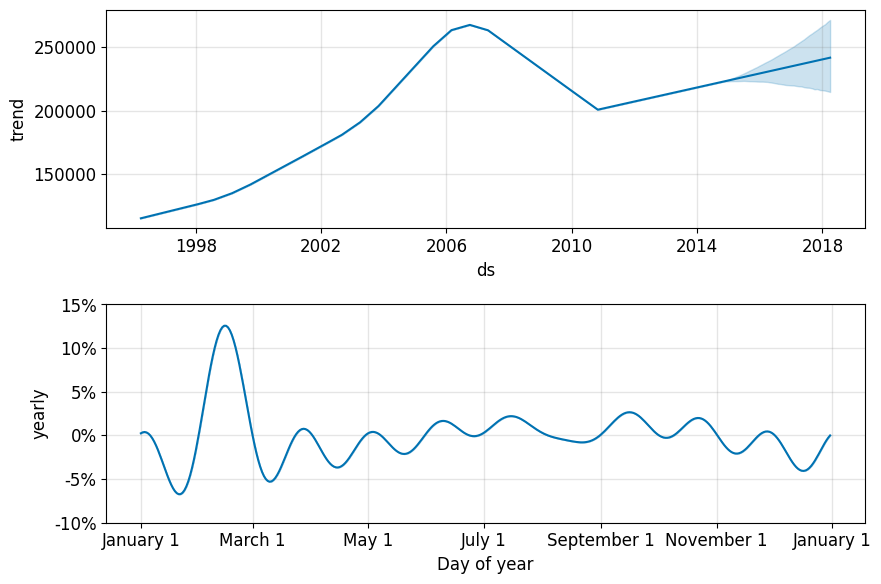

In [76]:

class TimeSeriesPipeline:
    def __init__(self, data_path, n_splits=5):
        self.data_path = data_path
        self.data = None
        self.model = None
        self.forecast = None
        self.n_splits = n_splits

    def load_data(self):
        self.data = pd.read_excel(self.data_path)

    def preprocess_data(self, target_column='y', ds_column='ds'):
        self.data[ds_column] = pd.to_datetime(self.data[ds_column])
        self.data = self.data.rename(columns={ds_column: 'ds', target_column: 'y'})

        if self.data.duplicated('ds').any():
            self.data = self.data.drop_duplicates(subset='ds', keep='first')

    def train_model(self, train_data):
        self.model = Prophet(seasonality_mode='multiplicative')
        self.model.fit(train_data)

    def make_predictions(self, test_data):
        future = self.model.make_future_dataframe(periods=len(test_data), freq='MS')
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        fig = self.model.plot(self.forecast)
        fig2 = self.model.plot_components(self.forecast)
        plt.show()

    def evaluate_model(self, test_data, y_true='y', y_pred='yhat'):
        y_true = test_data[y_true].values
        y_pred = self.forecast[-len(test_data):][y_pred].values
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        return r2, mse, rmse

    def run_pipeline(self, target_column='y', ds_column='ds'):
        self.load_data()
        self.preprocess_data(target_column=target_column, ds_column=ds_column)

        tscv = TimeSeriesSplit(n_splits=self.n_splits)
        for train_index, test_index in tscv.split(self.data):
            train_data, test_data = self.data.iloc[train_index], self.data.iloc[test_index]

            self.train_model(train_data)
            self.make_predictions(test_data)
            self.plot_forecast()
            self.evaluate_model(test_data, y_true='y', y_pred='yhat')


class SaveModel(TimeSeriesPipeline):
    def save_model(self, model_path='house_value_predictor.pkl'):
        joblib.dump(self.model, model_path)


data_path = "output_2.xlsx"
target_column = 'y'
pipeline = SaveModel(data_path)
pipeline.run_pipeline(target_column='value', ds_column='time')
pipeline.save_model()


Working with the ETL pipeline produces the best results because the training and test sets are split into folds. This provides a cross validation technique. From the plots, the model learns the pattern pretty well even during the 2008 crisis. 

Doing a cross validation of every split to get the test scores for the **evaluate model** is however not feasible because of larget training times it takes. It is for this reason that we opt to depend on the visualization of forecasted and real values. 

The prophet model learns the seasonality in the zillow housing data as shown by the plots of every fold. The forecast shows a steady rise of home value for the specified zipcodes. 

There is an yearly season where the house values normally peak December. 

### <b> <span style='color:#16C2D5'>|</span> ZipCodes house prediction</b>

Using the data saved in the csv file **Zipcode_predict.csv**, we set out to investigate how the facebook prophet handles the predictions for the top 30 zipcodes that had houses with higher values.

Just like before, obtaining the scores from the model seems pretty time consuming and may not be feasible at this time. 

14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing


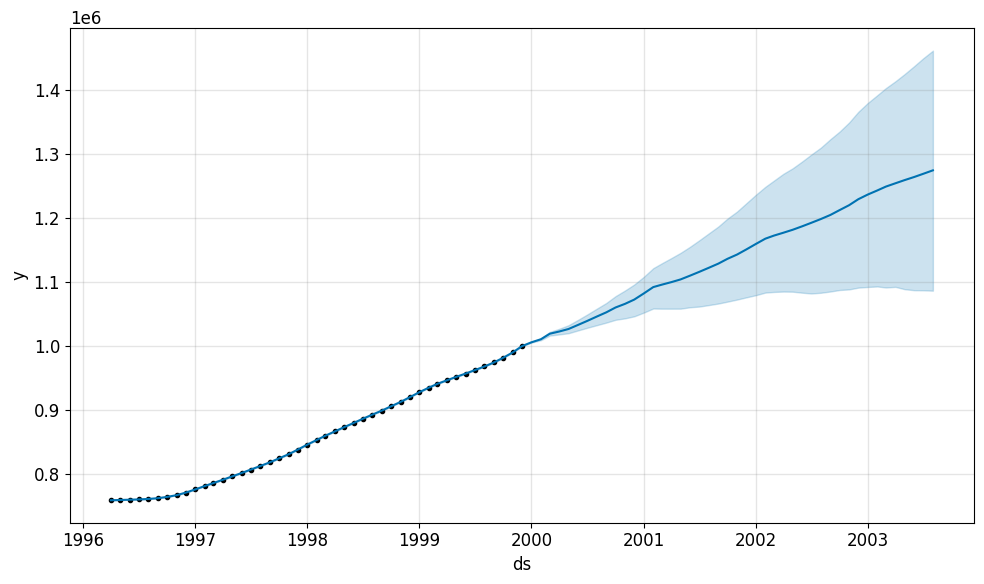

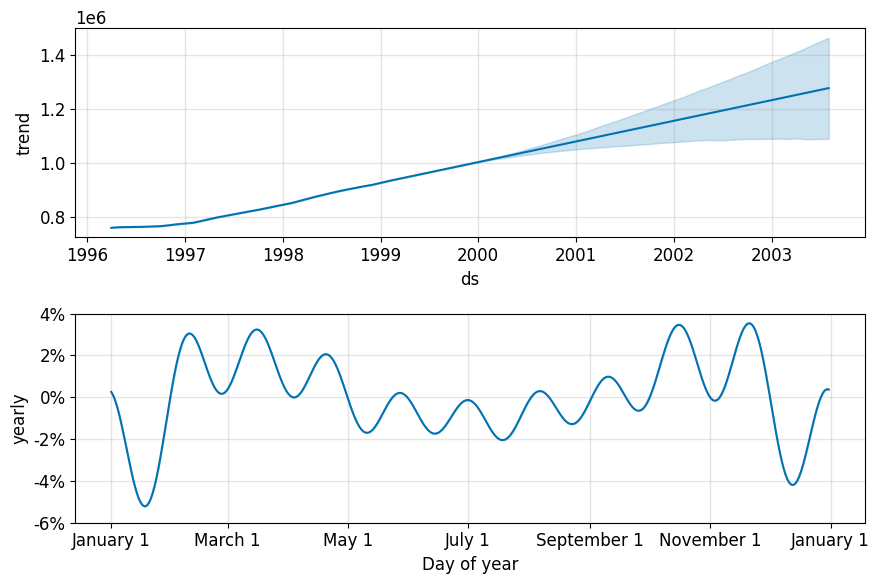

14:31:03 - cmdstanpy - INFO - Chain [1] start processing
14:31:04 - cmdstanpy - INFO - Chain [1] done processing


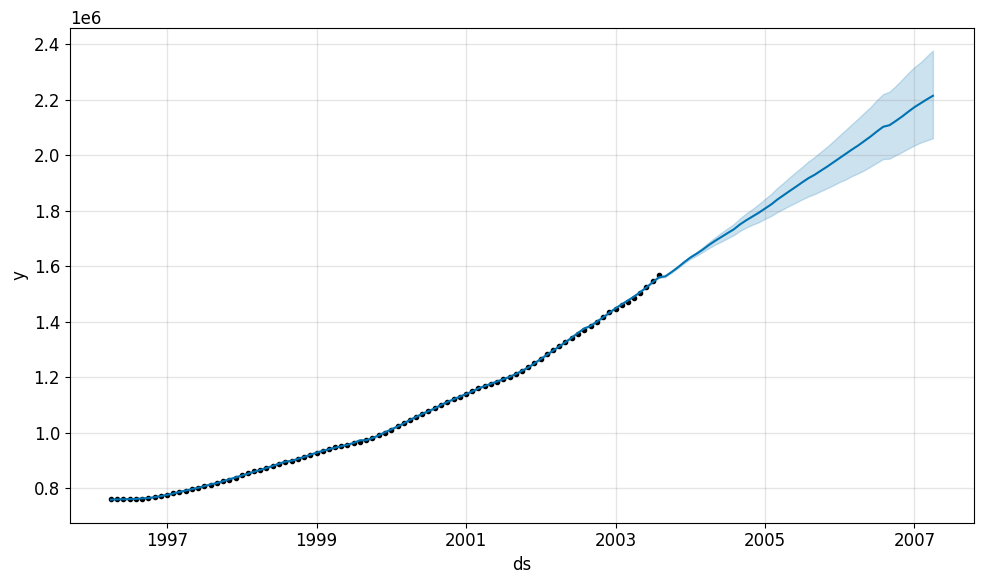

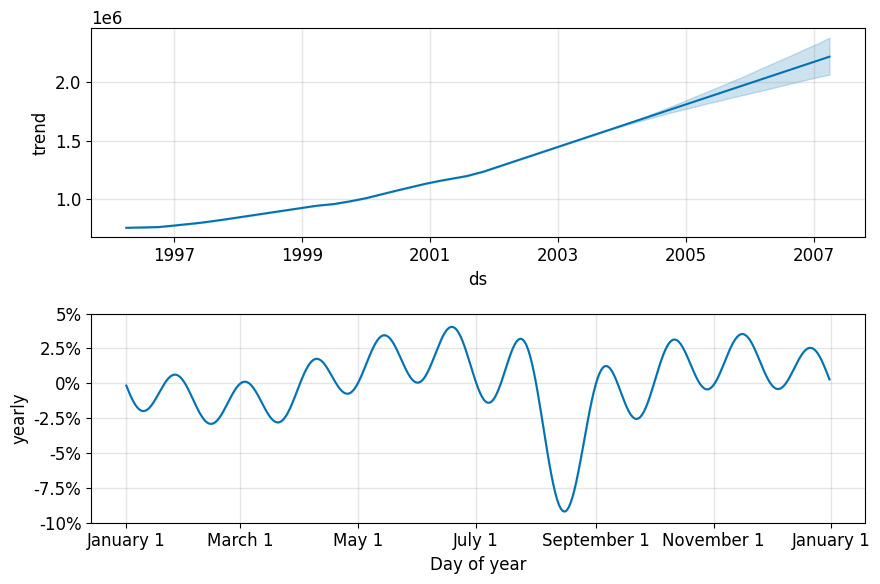

14:31:05 - cmdstanpy - INFO - Chain [1] start processing
14:31:05 - cmdstanpy - INFO - Chain [1] done processing


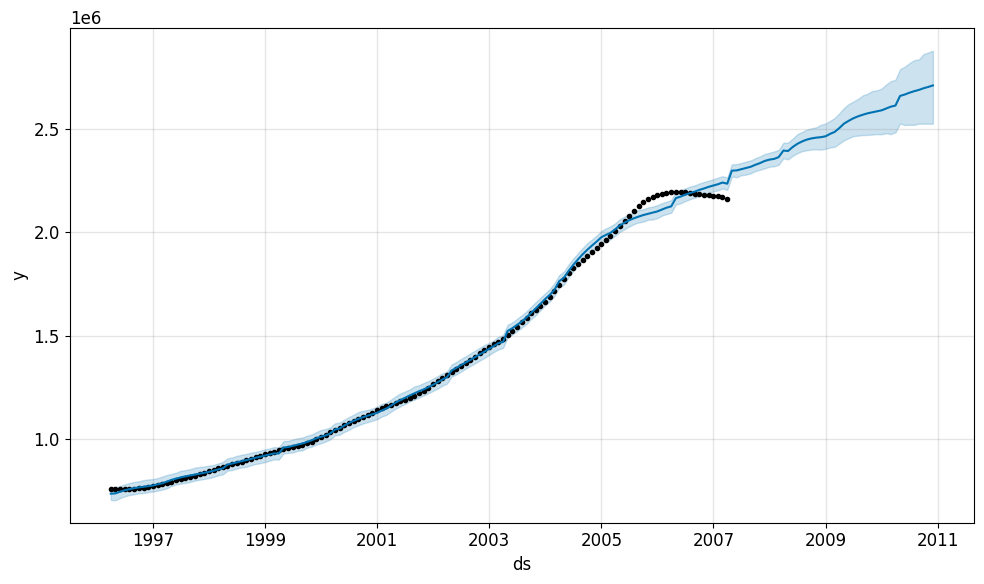

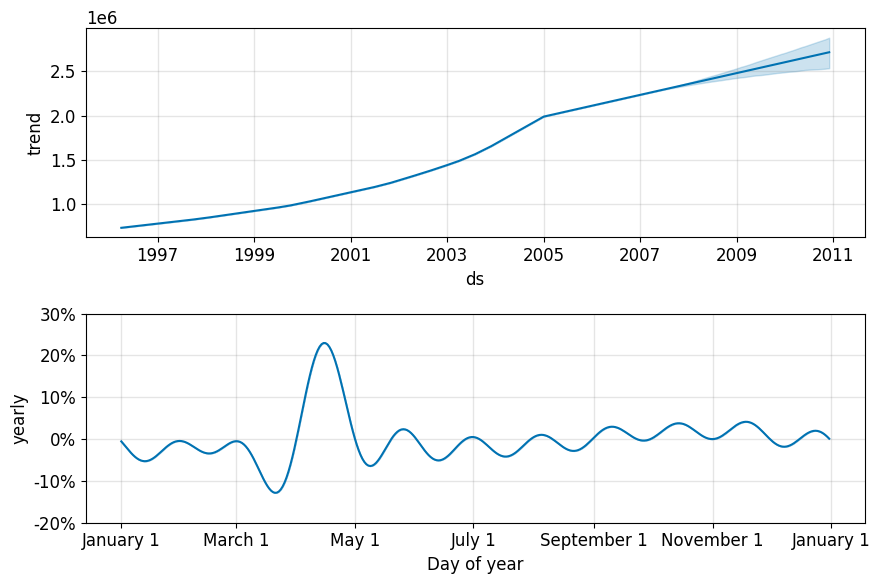

14:31:07 - cmdstanpy - INFO - Chain [1] start processing
14:31:07 - cmdstanpy - INFO - Chain [1] done processing


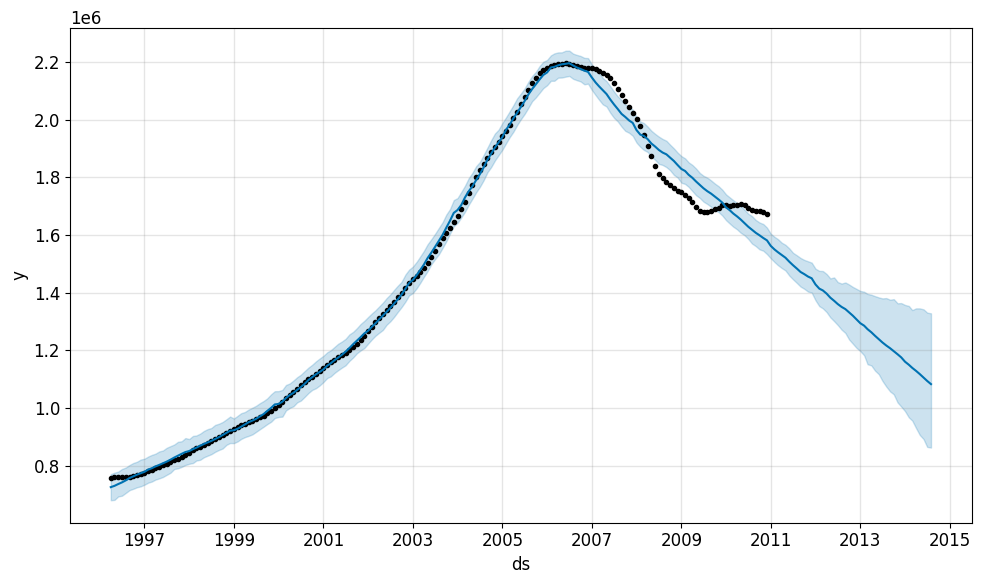

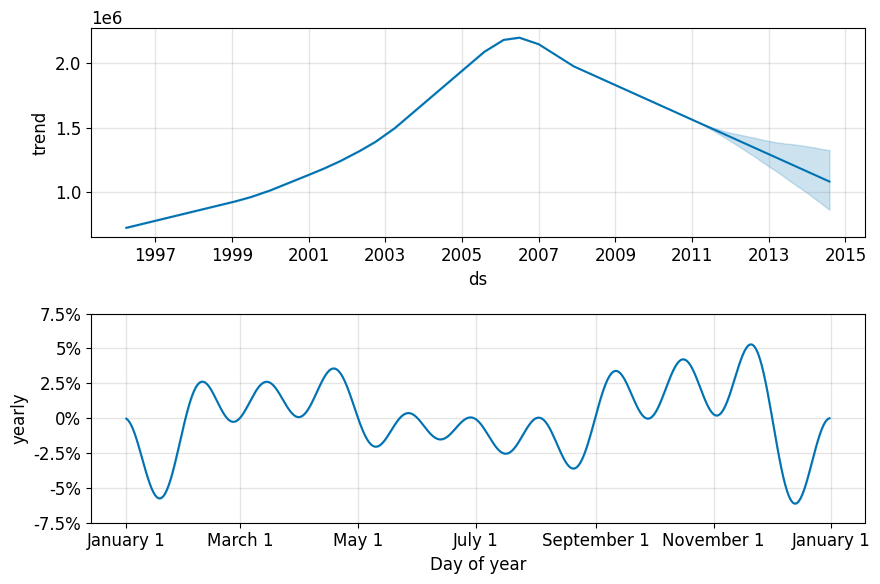

14:31:08 - cmdstanpy - INFO - Chain [1] start processing
14:31:09 - cmdstanpy - INFO - Chain [1] done processing


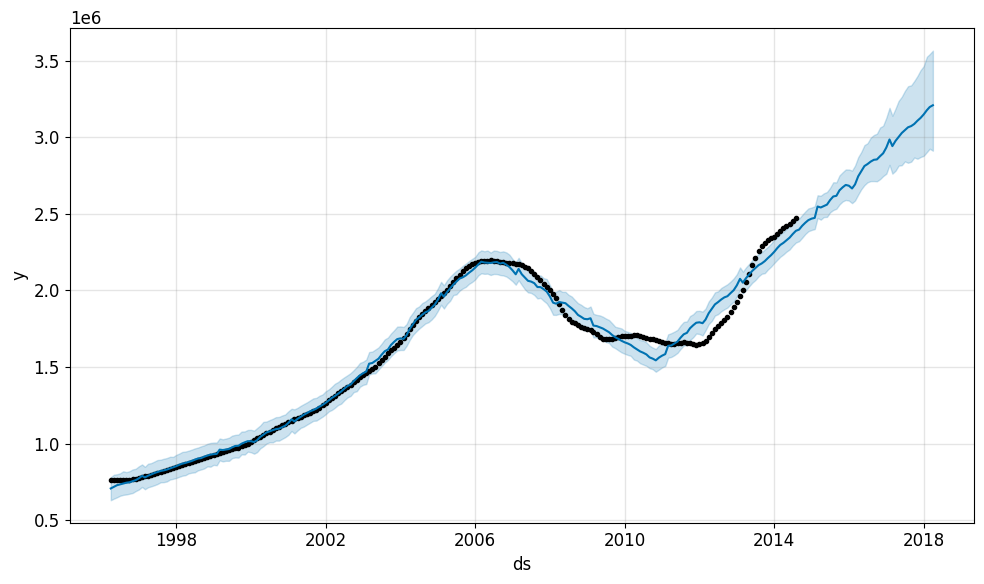

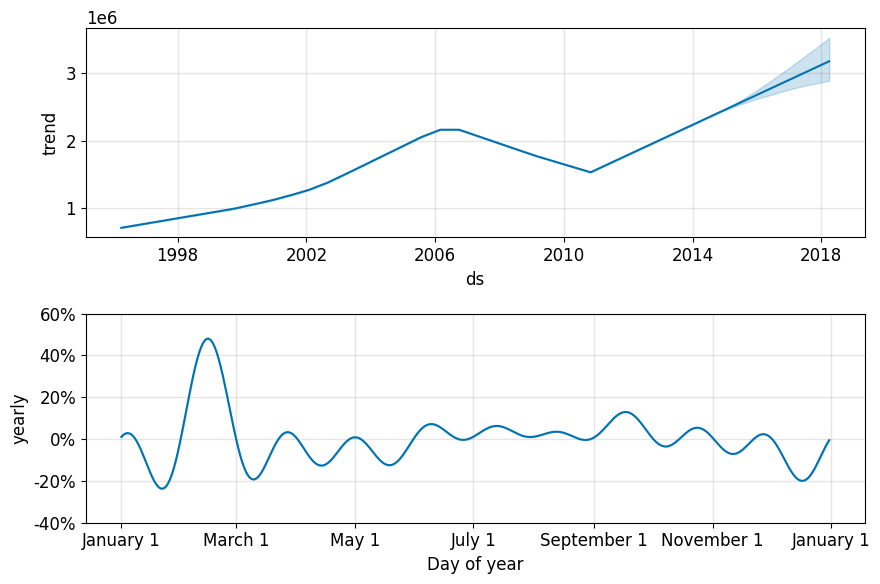

In [78]:

class TimeSeriesPipeline2:
    def __init__(self, data_path, n_splits=5):
        self.data_path = data_path
        self.data = None
        self.model = None
        self.forecast = None
        self.n_splits = n_splits

    def load_data(self):
        self.data = pd.read_csv(self.data_path)

    def preprocess_data(self, target_column='y', ds_column='ds'):
        self.data[ds_column] = pd.to_datetime(self.data[ds_column])
        self.data = self.data.rename(columns={ds_column: 'ds', target_column: 'y'})

        if self.data.duplicated('ds').any():
            self.data = self.data.drop_duplicates(subset='ds', keep='first')

    def train_model(self, train_data):
        self.model = Prophet(seasonality_mode='multiplicative')
        self.model.fit(train_data)

    def make_predictions(self, test_data):
        future = self.model.make_future_dataframe(periods=len(test_data), freq='MS')
        self.forecast = self.model.predict(future)

    def plot_forecast(self):
        fig = self.model.plot(self.forecast)
        fig2 = self.model.plot_components(self.forecast)
        plt.show()

    def evaluate_model(self, test_data, y_true='y', y_pred='yhat'):
        y_true = test_data[y_true].values
        y_pred = self.forecast[-len(test_data):][y_pred].values
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        return r2, mse, rmse

    def run_pipeline(self, target_column='y', ds_column='ds'):
        self.load_data()
        self.preprocess_data(target_column=target_column, ds_column=ds_column)

        tscv = TimeSeriesSplit(n_splits=self.n_splits)
        for train_index, test_index in tscv.split(self.data):
            train_data, test_data = self.data.iloc[train_index], self.data.iloc[test_index]

            self.train_model(train_data)
            self.make_predictions(test_data)
            self.plot_forecast()
            self.evaluate_model(test_data, y_true='y', y_pred='yhat')


class SaveModel(TimeSeriesPipeline2):
    def save_model(self, model_path='zipCode_value_predictor.pkl'):
        joblib.dump(self.model, model_path)


data_path = "Zipcode_predict.csv"
target_column = 'y'
pipeline = SaveModel(data_path)
pipeline.run_pipeline(target_column='value', ds_column='time')
pipeline.save_model()


From the plots, what can be deduced is that the model predicts an upward trend of house prices in the specific ZipCodes and in the event of any future crisis, the model has demonstrated its capability of learning the patterns and trends exhibited by the data. 

### <b><span style='color:#16C2D5'>|</span> Modelling Conclusion</b> 

Three models were used specifically the baseline ARIMA model, the auto arima model to find the best pdq combinations, ARIMA models with the best combination sto minimize the AIC scores and finally the prophet model using an ETL pipeline. 

The ARIMA model with the lowest AIC scores of **716** was the one of order **0,2,0**. This model gave us the best possible forecasted values to answer our business objective. To find the forecasted value for each zipcode, the forecasted value was averaged.

The use of **TimeSeriesSplit** as a cross validation technique came in handy. This is because the data in the training and test sets is split into folds so as to get a variety of several forecasted value for each zipCode. These forecasted values are then averaged to get the real forecast value for every zipCode. 

The **Facebook** model also came in handy because it handles seasonality well especially with the financial crisis in 2008 when house prices tanked. From the plots, the model showed an upward trend of house prices in the zipcodes but each with a different percentage as observed from the forecasted results best ARIMA model. This model captured the seasonality and from the plots, it is clear houses fetch for higher prices between December.

In the event of any future financial crisis, the facebook prophet model has parameters which can be adjusted to capture the seasonality and learn the pattern in data. The parameters include:
* The add_seasonality function
* Adjusting the fourier order to capture complex seasonality(High fourier orders capture complex patterns)
* Adding other regressors which may impact on the way the model learns the data.

With all this said, the **Prophet** model has very useful parameters that can be adjusted in the event of any crisis. 

The models to forecast both the average monthly house values and the zip codes values have been saved to pickle files and may be used during the production and deployment process because they exhibit great learning patterns. 



## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 4. Conclusion</span></b> </div>


The top 5 ZipCodes the investor should inves in include:
* A focus on the forecasted house values, then ZipCodes **10021, 10011, 10014, 90210 and 94027**.
* A focus on the growth rates, then ZipCodes **27980(+3%), 30032(+2%), 80216(+1.7%), 89030(+1.5%), 94621(+1.5%)** 

